## 1 Application of descriptive statistics using Python

## 1.1 Getting ready for the data analysis

We will work with a data file that contains daily temperature data observed at Albany Airport (KALB). This data file is part of the [Global Historical Climatology Network daily (GHCNd)](https://www.ncei.noaa.gov/products/land-based-station/global-historical-climatology-network-daily) data base, which includes thousands of meteorological stations from within the US and the rest of the world.

### 1.1.1 Download and upload of the data file

Download the data file named *USW00014735_temp_1950-2021_daily.csv* from the 
[Github repository](https://github.com/oet808/ATMENV315/tree/master/data). Upload it to your local data directory on the Jupyter Hub. Make sure the file name is correct and ends with '.csv'
### 1.1.2 Take a first look at the data in the file:

- How many columns with data are in the file?
- How many lines (rows) with data are in the file?
- Does the file start with comments /text info at the top? If so, how many lines are non-data lines (header lines)?
- Is there a line with column names (labels) for each column?
- What meteorological data are in the file?

 


### 1.1.3 Import of package Pandas

Once you have informed yourself about that data file and the structure of the data, let's get to work with the data. In this notebook version (in spring 2022) we will make use of the package Pandas. With Pandas we have new methods and functions available. We will work with a new data type that we will refer to a bit sloppy as 'dataframe'. But at this level it will be sufficient. We just want to distinguish from the regular numpy arrays.


In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# Import the new package Pandas
import pandas as pd


# Tip: You can change the style of the plots by choosing from 
# the matplotlib styles. 
# More help can be found through a quick google search
from matplotlib import style 
style.use('ggplot') #'classic' 


## 1.2 Getting familiar with the Pandas class _pandas.core.frame.DataFrame_


### 1.2.1 Reading the data and creating a dataframe object

Many Python coders use in their code a variable name such as _df_ when they work with a dataframe object. We apply the Pandas function _read_csv()_  to read the data table from the csv file and assign it to the variable df.

In [2]:
local_path='../data/'
filename=local_path+'USW00014735_temp_1950-2021_daily.csv'

df=pd.read_csv(filename,delimiter=',',skiprows=0)

In [3]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


### 1.2.2 Visualize the dataframe in the Notebook

When you just type in the variable name df and run the cell, you will see the dataframe.
Note: This is quite a nice layout. Jupyter does the formatting for our convenience (the print-function in Python does not do the same decent job).


In [4]:
df

,Unnamed: 0,year,month,day,avgt,mint,maxt,time
0,0,1950.0,1.0,1.0,29.5,22.0,37.0,1950-01-01
1,1,1950.0,1.0,2.0,35.5,32.0,39.0,1950-01-02
2,2,1950.0,1.0,3.0,46.5,38.0,55.0,1950-01-03
3,3,1950.0,1.0,4.0,59.5,55.0,64.0,1950-01-04
4,4,1950.0,1.0,5.0,49.5,35.0,64.0,1950-01-05
...,...,...,...,...,...,...,...,...
26293,26293,2021.0,12.0,27.0,30.0,26.0,34.0,2021-12-27
26294,26294,2021.0,12.0,28.0,38.5,31.0,46.0,2021-12-28
26295,26295,2021.0,12.0,29.0,35.5,33.0,38.0,2021-12-29
26296,26296,2021.0,12.0,30.0,39.5,35.0,44.0,2021-12-30


### 1.2.3 Getting information about the data columns

Dataframes have additional attributes that describe the data. They can be accessed using
the '_df.something_' where something is a name of the attribute. For example:



In [5]:
df.columns

Index(['Unnamed: 0', 'year', 'month', 'day', 'avgt', 'mint', 'maxt', 'time'], dtype='object')

### 1.2.4 Getting data columns from the dataframe _df_

Now the cool thing about these column names. We see the column names are strings. These strings we can use to refer to the data columns and get the data from that column.

In [6]:
y=df['avgt'] # get the data column labeled 'avgt' 
x=df['Unnamed: 0'] # get the counter index (number of days)
y

0        29.5
1        35.5
2        46.5
3        59.5
4        49.5
         ... 
26293    30.0
26294    38.5
26295    35.5
26296    39.5
26297    42.5
Name: avgt, Length: 26298, dtype: float64

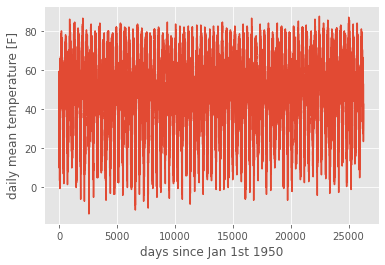

In [7]:
plt.plot(x,y)
plt.xlabel('days since Jan 1st 1950')
plt.ylabel('daily mean temperature [F]')
plt.show()
# Note avgt and index are not simple numpy arrays 

### 1.2.5 Practice getting data columns from the dataframe _df_ 

- Get the daily minimum temperature and plot the time series.
- Get the daily maximum temperature and plot the time series.
- Get the year data and plot the time series.
- Get the month data and plot the time series.

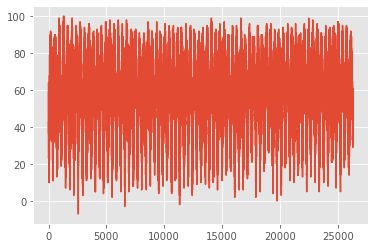

In [8]:
y=df['maxt'] # get the data column labeled 'avgt' 
x=df['Unnamed: 0']
plt.plot(x,y)
plt.show()

### 1.3 Getting subsets of data with the query method

We demonstrate how we can use data in one column of the dataframe to select subsets of data rows: 

- select rows for a specific month
- select a range of years
- select a specific day in a month

Ultimately, we want to create a plot like this: 30-year climatology of monthly temperatures similar to this curve in the image below (obtained from [ClimateCharts](https://climatecharts.net/))

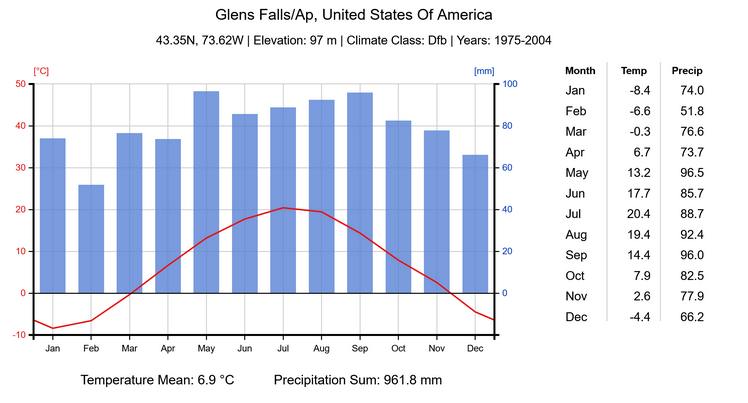

In [9]:
from IPython.display import Image
Image("example_climate_chart_glens_falls.png",width=600)
# Image is a function that we call to display the image

---
For this purpose we need to separate the daily data into groups. For each month, we calculate the mean temperature. There several ways to do that, one method is the query method. If you 'push' yourself to comprehend the examples and and pay attention to the syntax within the query string, you have an extremely powerful tool at your hand.
The query strings make use of the same syntax rules as Python Boolean expressions.


---


## 1.3 Examples for subsampling data frames using the query method.

### 1.3.1 Example: Use the query method to get the data from February

Take another look at the CSV file. The column labeled 'month' contains float numbers 
1.0, 2.0, 3.0 ... 11.0, 12.0.

Each represents the calendar months Jan, Feb, Mar, ... , Nov, Dec, respectively.

So, we can start a search for the rows (the row index position) where the column 'month' contains the value 2.0.

Below is the syntax: 


In [10]:
dfq1=df.query("month == 2.0")
dfq1

,Unnamed: 0,year,month,day,avgt,mint,maxt,time
31,31,1950.0,2.0,1.0,20.0,16.0,24.0,1950-02-01
32,32,1950.0,2.0,2.0,30.0,23.0,37.0,1950-02-02
33,33,1950.0,2.0,3.0,22.5,9.0,36.0,1950-02-03
34,34,1950.0,2.0,4.0,24.5,14.0,35.0,1950-02-04
35,35,1950.0,2.0,5.0,16.5,8.0,25.0,1950-02-05
...,...,...,...,...,...,...,...,...
25987,25987,2021.0,2.0,24.0,40.0,35.0,45.0,2021-02-24
25988,25988,2021.0,2.0,25.0,35.0,26.0,44.0,2021-02-25
25989,25989,2021.0,2.0,26.0,30.5,22.0,39.0,2021-02-26
25990,25990,2021.0,2.0,27.0,37.0,30.0,44.0,2021-02-27


Note that we store the resulting data frame in variable _dfg1_. The number of rows has been considerable reduced because all rows that are not month February were dropped.


### 1.3.2 Example: Use the query method to select a year 

We can apply the query method now on the datafram _dfq1_ to select the February data from year 1989, for example.






In [11]:
dfq2=dfq1.query("year == 1989.0")
dfq2

,Unnamed: 0,year,month,day,avgt,mint,maxt,time
14276,14276,1989.0,2.0,1.0,51.0,37.0,65.0,1989-02-01
14277,14277,1989.0,2.0,2.0,26.5,16.0,37.0,1989-02-02
14278,14278,1989.0,2.0,3.0,22.5,16.0,29.0,1989-02-03
14279,14279,1989.0,2.0,4.0,12.5,9.0,16.0,1989-02-04
14280,14280,1989.0,2.0,5.0,16.5,11.0,22.0,1989-02-05
14281,14281,1989.0,2.0,6.0,25.5,19.0,32.0,1989-02-06
14282,14282,1989.0,2.0,7.0,18.5,8.0,29.0,1989-02-07
14283,14283,1989.0,2.0,8.0,18.5,4.0,33.0,1989-02-08
14284,14284,1989.0,2.0,9.0,10.5,2.0,19.0,1989-02-09
14285,14285,1989.0,2.0,10.0,18.5,10.0,27.0,1989-02-10


### 1.3.3 Example: Use the query method to select a year range 1989-1993

We can apply the query method now on the datafram _dfq1_ to select the February data of the years 1989-1993, for example.

In [12]:
dfq3=dfq1.query("year >= 1989.0 and  year <= 1993") 
dfq3

,Unnamed: 0,year,month,day,avgt,mint,maxt,time
14276,14276,1989.0,2.0,1.0,51.0,37.0,65.0,1989-02-01
14277,14277,1989.0,2.0,2.0,26.5,16.0,37.0,1989-02-02
14278,14278,1989.0,2.0,3.0,22.5,16.0,29.0,1989-02-03
14279,14279,1989.0,2.0,4.0,12.5,9.0,16.0,1989-02-04
14280,14280,1989.0,2.0,5.0,16.5,11.0,22.0,1989-02-05
...,...,...,...,...,...,...,...,...
15760,15760,1993.0,2.0,24.0,14.0,8.0,20.0,1993-02-24
15761,15761,1993.0,2.0,25.0,9.5,-1.0,20.0,1993-02-25
15762,15762,1993.0,2.0,26.0,12.5,-4.0,29.0,1993-02-26
15763,15763,1993.0,2.0,27.0,13.0,-4.0,30.0,1993-02-27


### 1.3.4 Example: Combining two or more queries in one expression
Now let's do  the two steps in one query:

We can apply the query method on the original datafram _df_ to select the February data of the years 1989-1993:


In [13]:
dfq4=df.query("month == 2.0 and year >=1989 and year <= 1993.0")
dfq4

,Unnamed: 0,year,month,day,avgt,mint,maxt,time
14276,14276,1989.0,2.0,1.0,51.0,37.0,65.0,1989-02-01
14277,14277,1989.0,2.0,2.0,26.5,16.0,37.0,1989-02-02
14278,14278,1989.0,2.0,3.0,22.5,16.0,29.0,1989-02-03
14279,14279,1989.0,2.0,4.0,12.5,9.0,16.0,1989-02-04
14280,14280,1989.0,2.0,5.0,16.5,11.0,22.0,1989-02-05
...,...,...,...,...,...,...,...,...
15760,15760,1993.0,2.0,24.0,14.0,8.0,20.0,1993-02-24
15761,15761,1993.0,2.0,25.0,9.5,-1.0,20.0,1993-02-25
15762,15762,1993.0,2.0,26.0,12.5,-4.0,29.0,1993-02-26
15763,15763,1993.0,2.0,27.0,13.0,-4.0,30.0,1993-02-27


---

### References:

Links to web pages with examples / tutorials on Pandas dataframes:
    
- [Pandas quickstart guide](https://pandas.pydata.org/docs/user_guide/10min.html)
- [Examples how to apply the query method](https://towardsdatascience.com/10-examples-that-will-make-you-use-pandas-query-function-more-often-a8fb3e9361cb)

